# Θεωρητικό θέμα:

Περιγράψτε συνοπτικά:

α) Τα Τυχαία δάση (Random Forests).

β) Τον Αλγόριθμο του k-Πλησιέστερου Γείτονα (k-Nearest Neighbor).

**α)** Τα τυχαία δάση (Random Forests) είναι ένας αλγόριθμος μηχανικής μάθησης που βασίζεται στον συνδυασμό πολλών απλών αποφάσεων δέντρων (decision trees).
Ο αλγόριθμος των τυχαίων δασών πραγματοποιεί την κατηγοριοποίηση ή πρόβλεψη βασιζόμενος στις αποφάσεις που παίρνουν τα απλά δέντρα. Κατά τη διάρκεια της πρόβλεψης, κάθε δέντρο ψηφίζει για την επιλογή της κατηγορίας (στην κατηγοριοποίηση) ή παράγει μια πρόβλεψη (στην πρόβλεψη). Τελικά, οι ψήφοι ή οι προβλέψεις συγκεντρώνονται και η τελική απόφαση λαμβάνεται με βάση την πλειοψηφία ή τη μέση τιμή των αποτελεσμάτων των δέντρων. Τα τυχαία δάση είναι αποδοτικά σε μεγάλα σετ δεδομένων και μπορούν να προσαρμοστούν για προβλήματα ταξινόμησης και παλινδρόμησης, καθώς και για ανίχνευση ανωμαλιών και επιλογή χαρακτηριστικών.

**β)** Ο αλγόριθμος του k-Πλησιέστερου Γείτονα (k-Nearest Neighbor) είναι ένας αλγόριθμος μηχανικής μάθησης για ταξινόμηση και παλινδρόμηση. Συχνά αναφέρεται και ως "lazy" επειδή δεν υπάρχει φάση εκπαίδευσης, ο αλγόριθμος απλά αποθηκεύει τα δεδομένα εκπαίδευσης. Στη φάση της πρόβλεψης, για κάθε νέο δείγμα, ο αλγόριθμος βρίσκει τα k πιο κοντινά δείγματα εκπαίδευσης σε όρους απόστασης και αποφασίζει την κατηγορία του βάσει της πλειοψηφίας των γειτόνων. Ο αλγόριθμος μπορεί να χρησιμοποιηθεί με διάφορες μετρικές απόστασης, όπως η Ευκλείδεια απόσταση ή η απόσταση Manhattan. Ο αλγόριθμος του k-Πλησιέστερου Γείτονα είναι απλός στην υλοποίηση, αλλά μπορεί να απαιτεί αρκετό χρόνο για την πρόβλεψη μεγάλων σετ δεδομένων.

***

# Project: k-NN με το dataset diabetes

Σε αυτό το σύνολο δεδομένων, θέλουμε να προβλέψουμε **εάν το άτομο έχει διαβήτη ή όχι** με βάση διαφορετικά χαρακτηριστικά. Θα χρησιμοποιήσουμε τον Αλγόριθμο του k-Πλησιέστερου Γείτονα (k-Nearest Neighbor).

***

> # Diabetes Prediction

Ο **Διαβήτης** είναι μια χρόνια ασθένεια που συμβαίνει όταν το πάνκρεας δεν μπορείνα παράγει ινσουλίνη ή το ίδιο το σώμα δεν χρησιμοποιεί σωστά την ινσουλίνη που παράγει.

**Σκοπός**: Να προβλέψουμε αν κάποιος έχει διαβήτη ή όχι. **Classification Problem** 

### 1. Import Libraries

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
plt.style.use('fivethirtyeight')

### 2. Loading and Understanding the  Dataset

In [5]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head() # Κάθε γραμμή (row) αντιπροσωπεύει διαφορετικό άτομο
# πχ. Ατομο 0 : έχει γεννήσει 6 φορές , έχει Γλυκόζη 148 και πίεση 72 κτλ

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Η **εξαρτημένη μεταβλητή** είναι το outcome που παίρνει 2 τιμές 1(έχει διαβήτη) ή 0(δεν έχει διαβήτη) ενώ οι υπόλοιπες μεταβλητές είναι οι **ανεξάρτητες** που θα χρησιμοποιήσουμε για την πρόβλεψη του outcome.

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.shape #Πόσες γραμμές και στήλες έχουμε

(768, 9)

In [10]:
# Απο το df.head() έιδαμε ότι οι περισσότες στείλες περιέχουν αριθμούς (numerical values)
# Ας το ελέγξουμε 
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.info() #summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Οι τύποι δεδομένων που έχουμε είναι είτε πραγματικοί αριθμοί είτε ακέραιοι

In [12]:
df.describe() # Στατιστικά για το dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Παρατηρούμε κάποιες τιμές εκτός οριών πχ:  **min insulin = 0.**

Θα μπορούσαμε να αντικαταστήσουμε αυτές τις τιμές στο data cleaning στάδιο με την μέση τιμή για να μην δημιουργήσουν πρόβλημα στο μοντέλο μας.

### 3. Data Cleaning

In [13]:
# μετράμε τον αριθμό των τιμών που λείπουν ανα στήλη
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

To επιβεβαιώσαμε και στο df.info() , δεν έχουμε missing data στο dataset

In [14]:
# αφαιρο΄ύμε τυχών καταχωρήσεις που έχουν περαστεί πάνω απο μια φορα
df=df.drop_duplicates()

In [15]:
df.shape # Ο αριθμός γραμμών παραμένει ίδιος.

(768, 9)

Παρατηρούμε ότι το dataset ήταν σε καλή κατάσταση.
- Δεν υπήρχαν στοιχεία που λείπουν
- Δεν υπήρχαν διπλές καταχωρήσεις
- Όλες οι στήλες έχουν σωστό τύπο στοιχείου , πχ δεν υπάρχει αριθμός περασμένος σαν string

Ένα θέμα που βρήκαμε στις στήλες μας ήταν οι μηδενικές καταχωρήσεις, insulin = 0 , bloodpressure = 0 .

<AxesSubplot:ylabel='Frequency'>

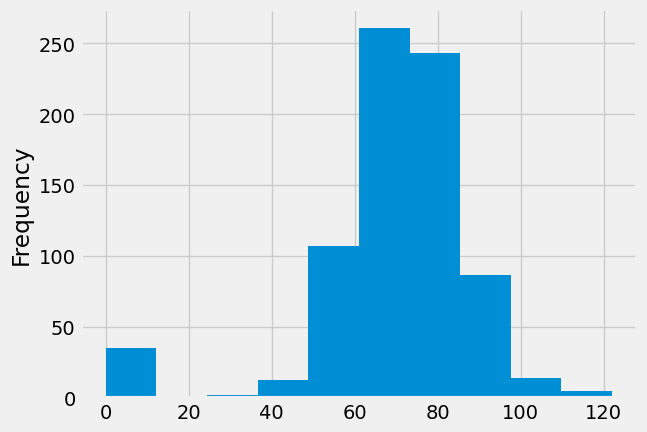

In [16]:
# Παρατηρο΄υμε ότι η διακύμανση των τιμών ακολουθεί μια κανονική κατανομή εκτός
# απο περίπου 40 μηδενικά που πρέπει να διορθώσουμε
df.BloodPressure.plot(kind='hist')

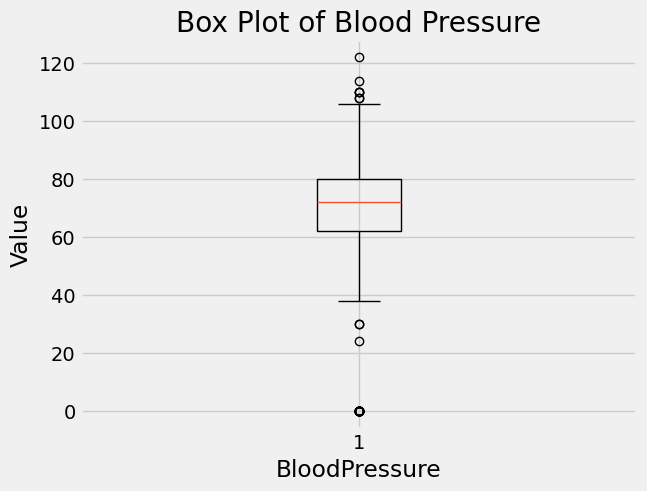

In [17]:
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')
plt.ylabel('Value')
plt.title('Box Plot of Blood Pressure')
plt.show()

In [18]:
count_zero = (df['BloodPressure'] == 0).sum()
print("Number of 0 values in BloodPressure:", count_zero)

Number of 0 values in BloodPressure: 35


In [19]:
#ομοια
print((df['Glucose']==0).sum())
print((df['SkinThickness']==0).sum())
print((df['Insulin']==0).sum())
print((df['BMI']==0).sum())

5
227
374
11


<AxesSubplot:ylabel='Frequency'>

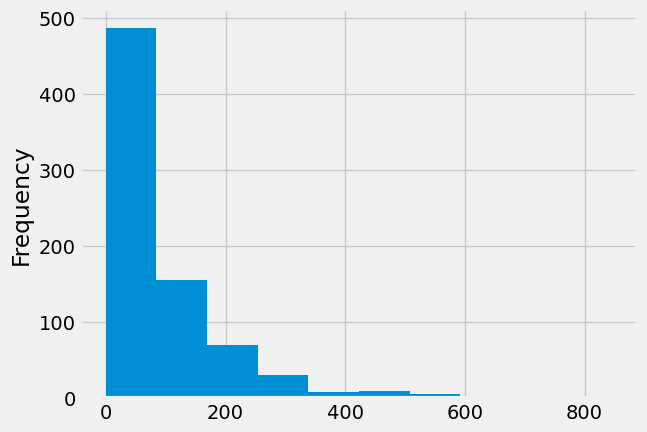

In [20]:
df.Insulin.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

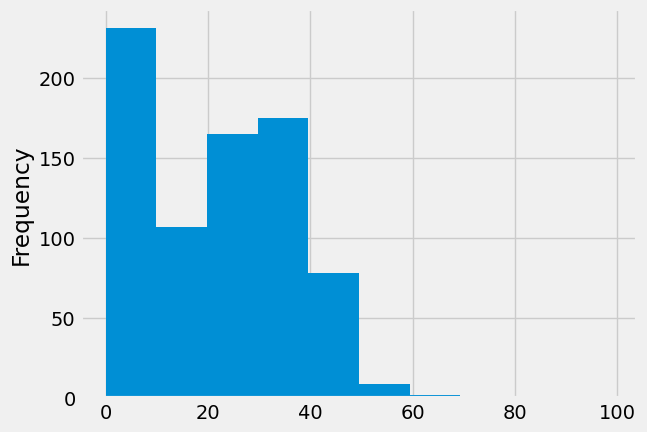

In [21]:
df.SkinThickness.plot(kind='hist')

Παρατηρούμε ότι αντίθετα με το BloodPressure κάποιες άλλες μεταβλητές έχουν πιο ασσύμετρες κατανομές οπότες μας βολεύει το να αντικαταστήσουμε τα μηδενικά με το median και όχι mean επειδή το **mean επηρεάζεται απο τα outliers**. 

πχ στο SkinThickness παρατηρούμε πάνω απο 200 μηδενικά και στο Insulin πάνω απο 350 για αυτο και θα πάρουμε το median.

<AxesSubplot:ylabel='Frequency'>

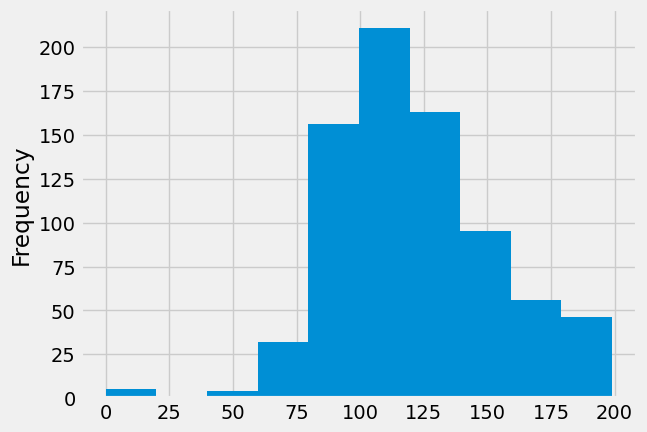

In [22]:
df.Glucose.plot(kind='hist')

In [23]:
# Αντικατάσταση μηδενικ΄ών με mean() και median() των κατανομών
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

Ας δούμε πάλι τις γραφικές

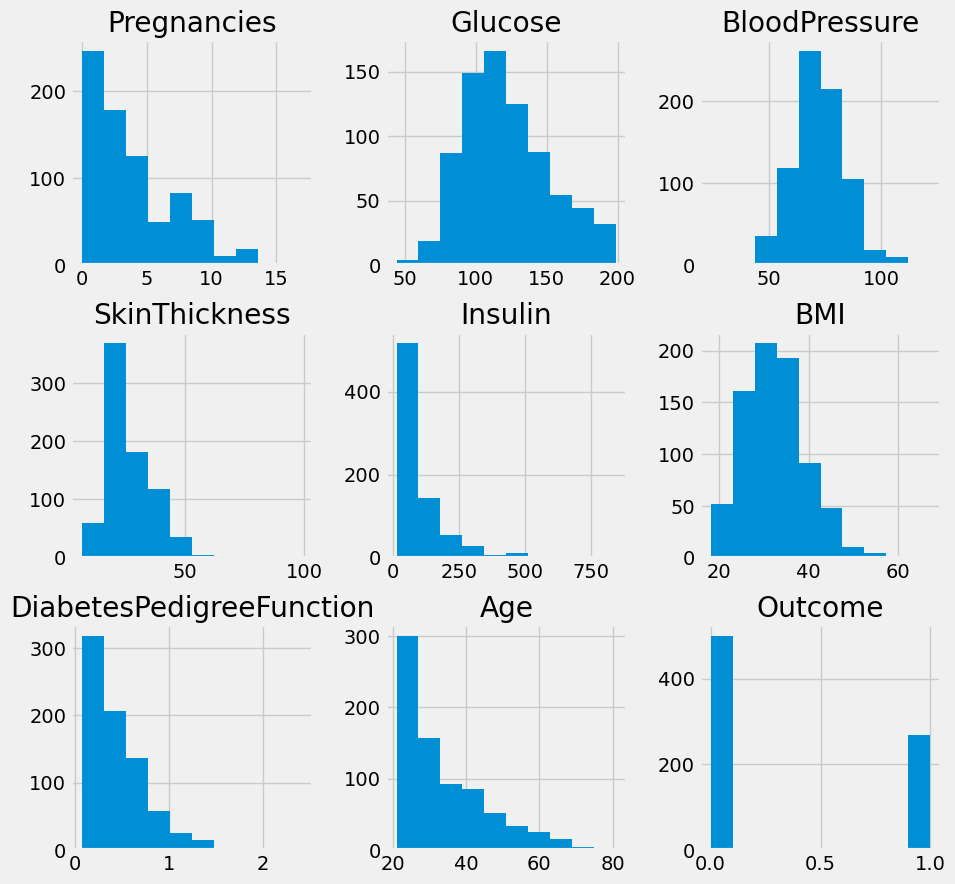

In [24]:
#histogram για κάθε μεταβλητή
df.hist(bins=10,figsize=(10,10))
plt.show()

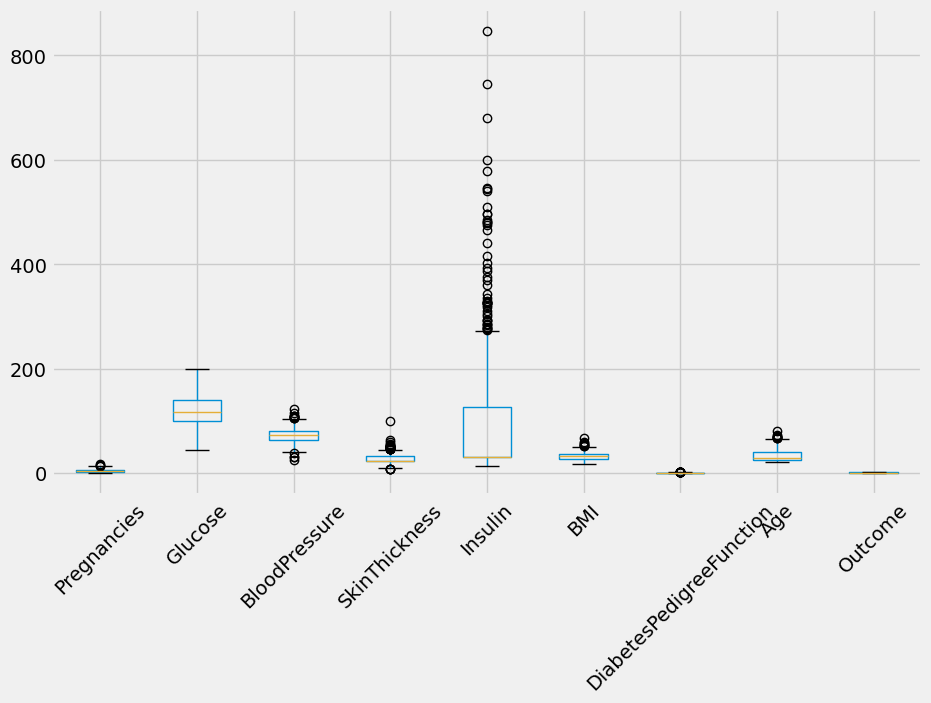

In [25]:
# outliers
plt.figure(figsize=(10, 6)) 
df.boxplot()

# Rotate x-axis labels
plt.xticks(rotation=45) 

# Show the plot
plt.show()

### Έχουν όλες οι μεταβλητές την ίδια επίδραση στο αποτέλεσμα;

### 4. Correlation Map

In [26]:
corrmap = df.corr()

In [27]:
corrmap

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


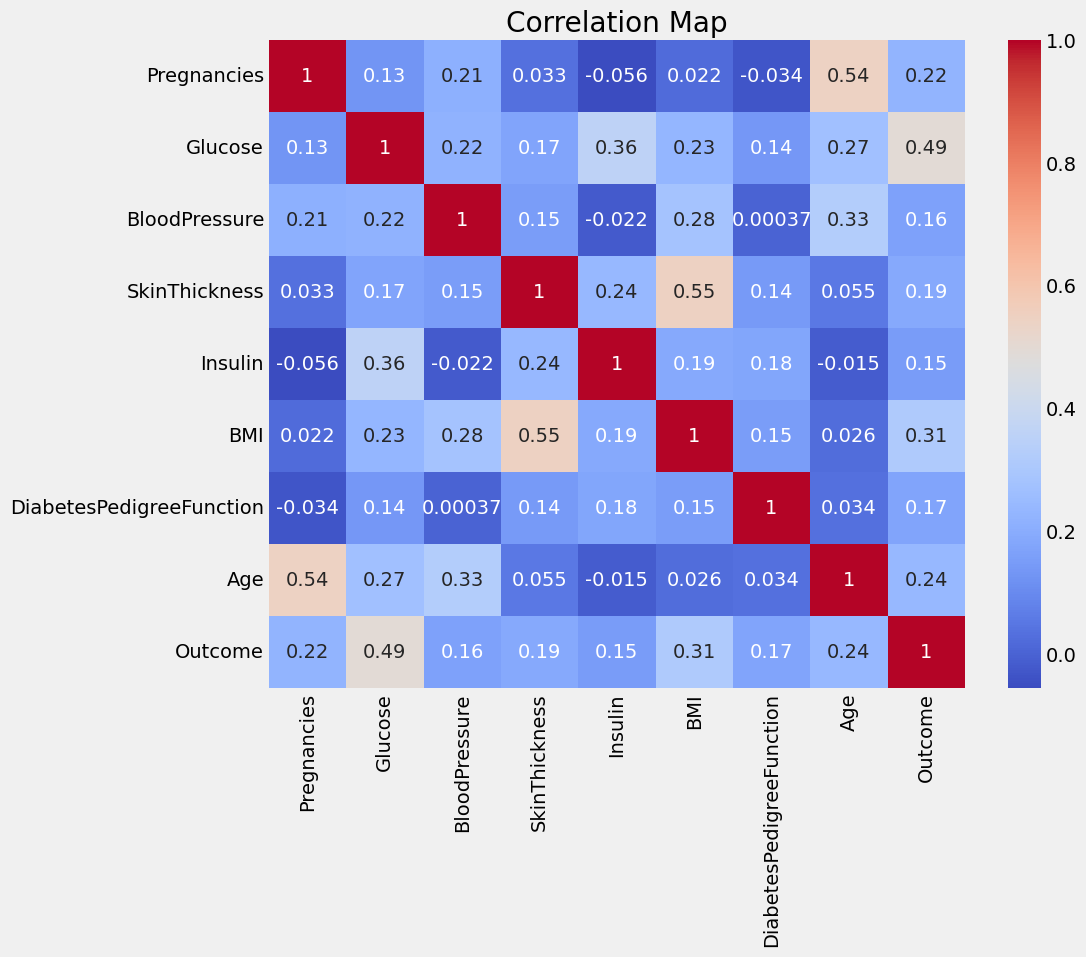

In [28]:
#visualizing the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corrmap,annot=True,cmap ='coolwarm')
plt.title("Correlation Map")
plt.show()

Παρατηρούμε ότι :

- Glucose , BMI , AGE έχουν την μεγαλύτερη επίδραση στο αποτέλεσμα
- ΒloodPressure Insulin DiabetesPedigreeFunction έχουν μικρότερη επίδραση

Φαντάζομαι ότι έχουμε αυτό το αποτέλεσμα λόγω του περιορισμένου μεγέθους του dataset και ίσως να μην υπάρχει ακρίβεια στα data. 

Δεν θα κάνουμε drop σε κάποια στήλη για τον απο πάνω λογο.

### 5. Modelling and Optimization

Χωρίζουμε το target variable απο το dataset και κάνουμε scale τις μεταβλητές μας

In [29]:
X = df.drop('Outcome',axis = 1 )
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [30]:
x_train.shape

(537, 8)

In [31]:
y_train.shape

(537,)

In [32]:
x_test.shape

(231, 8)

In [33]:
y_test.shape

(231,)

data split : 70% train , 30% test

In [34]:
# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [35]:
# K την τετραγωνικη ριζα του αριθμου των παραδειγματων στο συνολο μας.
math.sqrt(len(y_test))

15.198684153570664

In [36]:
#Εφαρμογη το KNN
classifier = KNeighborsClassifier(n_neighbors = 15 , metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [37]:
#Ακρίβεια
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7445887445887446


Confusion Matrix για να δούμε την επίδοση του μοντέλου μας

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred , normalize = 'true')
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

# Display the confusion matrix with percentages
print(cm_df)

        Predicted 0  Predicted 1
True 0      0.89404      0.10596
True 1      0.53750      0.46250


> ## Συμπέρασμα

Ανάλυση πάνω στο diabetes dataset  
- Είδαμε τα χαρακτηριστικά κάθε στήλης και τα στατιστικά του dataframe. 
- Εντοπίσαμε outliers , τύπους δεδομένων , λανθασμένα δεδομένα και ψάξαμε για τυχών δεδομένα που λείπουν. 
- Στην συνέχεια κάναμε scale τα δεδομένα και τα χωρίσαμε σε train set και test set για την εκπαίδευση machine learning μοντέλου. 
- Χρησιμοποιήσαμε έναν classification algorithm τον ΚΝΝ και φτιάξαμε έναν confusion matrix για να δούμε τα ποσοστά των σωστών προβλέψεων.

Το μοντέλο μας μπορεί να προβλέψει τον διαβήτη με 74% επιτυχία. 